In [2]:

import pandas as pd # for data handling
import numpy as np # for mathematical operations
import datetime as dt # for working with dates
%matplotlib inline
import matplotlib.pyplot as plt # for plotting
from loadandconvert import exportdf,deltatogas,removeoutliers,lscatter, plot1
pd.set_option('display.max_columns', 20)

In [3]:
# read in PROMICE as comparison
mydateparser = lambda x: dt.datetime.strptime(x, "%Y %m %d %H")
geus_h=pd.read_csv('/Users/swa048/forServer/Meteo/PROMICE_GEUS/2019/EGP_2020_06_24_v03/EGP_hour_v03.txt',delim_whitespace=True,index_col=(0),parse_dates=[[0, 1,2,3]],infer_datetime_format=True ,date_parser=mydateparser,na_values=['NAN',-999.00],usecols=(0,1,2,3,4,6,7,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24))
geus_h.rename(inplace=True,columns={ 
        'AirPressure(hPa)': 'Pa',
        'AirTemperature(C)': 'gTa',
        'RelativeHumidity(%)':'gRHa', #is calculated with respect to ice
        'WindSpeed(m/s)':'wsp',
        'SpecificHumidity(g/kg)':'q',
        'HeightSensorBoom(m)':'ranger_high',
        'HeightStakes(m)':'ranger_low',
        'LatentHeatFlux(W/m2)':'LE',
        'SensibleHeatFlux(W/m2)':'H',
        'WindDirection(d)':'wd',
        'ShortwaveRadiationDown(W/m2)':'SWin',
        'ShortwaveRadiationDown_Cor(W/m2)':'SWincorr',
        'ShortwaveRadiationUp(W/m2)':'SWout',
        'ShortwaveRadiationUp_Cor(W/m2)':'SWoutcorr',
        'LongwaveRadiationDown(W/m2)':'LWin',
        'LongwaveRadiationUp(W/m2)':'LWout',
        'SurfaceTemperature(C)':'gTs'})
    
geus_h=geus_h.loc['2018-05':'2018-08',:]

In [12]:
geus_h.columns

Index(['DayOfYear', 'Pa', 'gTa', 'gRHa', 'q', 'wsp', 'wd', 'H', 'LE', 'SWin',
       'SWincorr', 'SWout', 'SWoutcorr', 'Albedo_theta<70d', 'LWin', 'LWout',
       'CloudCover', 'gTs', 'ranger_high'],
      dtype='object')

In [4]:
dfEC=pd.read_csv('/Users/swa048/forServer/Meteo/EC/2018/EGRIP/onlinefluxes10min/CR3000_ec_scfd.dat',index_col=0,parse_dates=True,na_values=['NAN',-7999],skiprows=[0,2,3])#,dtype={'RECORD': np.int64, 'LE': np.float64, 'Hs': np.float64, 'tau': np.float64, 'u_star': np.float64, 'Ux_Ux': np.float64, 'Ux_Uy': np.float64, 'Ux_Uz': np.float64, 'Ux_ln_vh': np.float64, 'Ux_Ts': np.float64, 'Uy_Uy': np.float64, 'Uy_Uz': np.float64, 'Uy_ln_vh': np.float64, 'Uy_Ts': np.float64, 'Uz_Uz': np.float64, 'Uz_ln_vh': np.float64, 'Uz_Ts': np.float64, 'ln_vh_ln_vh': np.float64, 'ln_vh_Ts': np.float64, 'Ts_Ts': np.float64, 'Ux_Avg': np.float64, 'Uy_Avg': np.float64, 'Uz_Avg': np.float64, 'ln_vh_Avg': np.float64, 'Ts_Avg': np.float64, 'horiz_wind_spd': np.float64, 'result_wind_spd': np.float64, 'wind_dir': np.float64, 'wind_dir_std_dev': np.float64, 'wnd_dir_compass': np.float64, 'vh_Avg': np.float64, 'n_Tot': np.float64, 'del_T_f_Tot': np.float64, 'track_f_Tot': np.float64, 'amp_h_f_Tot': np.float64, 'amp_l_f_Tot': np.float64} )
#dfEC.rename(columns={'RECORD': 'DOY','Ts_Avg':'Ts'}, inplace=True)

In [7]:
dfEC.columns

Index(['RECORD', 'LE', 'Hs', 'tau', 'u_star', 'Ux_Ux', 'Ux_Uy', 'Ux_Uz',
       'Ux_ln_vh', 'Ux_Ts', 'Uy_Uy', 'Uy_Uz', 'Uy_ln_vh', 'Uy_Ts', 'Uz_Uz',
       'Uz_ln_vh', 'Uz_Ts', 'ln_vh_ln_vh', 'ln_vh_Ts', 'Ts_Ts', 'Ux_Avg',
       'Uy_Avg', 'Uz_Avg', 'ln_vh_Avg', 'Ts_Avg', 'horiz_wind_spd',
       'result_wind_spd', 'wind_dir', 'wind_dir_std_dev', 'wnd_dir_compass',
       'vh_Avg', 'n_Tot', 'del_T_f_Tot', 'track_f_Tot', 'amp_h_f_Tot',
       'amp_l_f_Tot'],
      dtype='object')

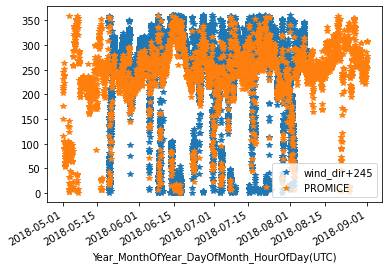

In [32]:

#dfEC.wind_dir.plot(Marker='*',ls='')
#dfEC.wnd_dir_compass.plot(Marker='*',ls='',label='CR3000')

dfwind.WD.plot(Marker='*',ls='',label='wind_dir+242')
geus_h.wd.plot(Marker='*',ls='',label='PROMICE')
plt.legend()

In [5]:
dfwind=pd.DataFrame(index=dfEC.index,columns=['WS_scalar','WD'])


#wd.average <- (atan2(mean.u, mean.v) * 360/2/pi) + 180
# it makes most sense to calculate the WD from the vector means of an hour

# the 180° that are in the programme were not specifically set.. 
Noffset=242
dfwind.loc[:,'WD']=np.round((dfEC.wind_dir+Noffset) %360,1)

#dfwind.loc[:,'WS_vector']=np.round(np.sqrt(dfEC.Ux_Avg**2+dfEC.Uy_Avg**2),2)
dfwind.loc[:,'WS_scalar']=np.round(dfEC.result_wind_spd,2) #sample at 10 min but maybe its also the vector mean
# 'horiz_wind_spd','result_wind_spd', 'wind_dir', 'wind_dir_std_dev', 'wnd_dir_compass'
# --> those are all samples at the 10min intervals, not averaged over 10min

# the averaged 10min wind vectors are Ux_Avg, Uy_Avg, Uz_Avg

exportdf(dfwind,'/Users/swa048/forServer/Meteo/Ambient/2018/EGRIP/data/','EGRIP2018_CSATwind')

In [43]:
dfwind

,WS_scalar,WD
TIMESTAMP,,
2018-05-19 11:50:00,4.19,335.4
2018-05-19 12:10:00,4.16,341.3
2018-05-19 12:20:00,4.13,342.7
2018-05-19 12:30:00,3.67,345.5
2018-05-19 12:40:00,3.64,349.8
...,...,...
2018-08-07 12:20:00,5.70,282.2
2018-08-07 12:30:00,5.29,282.7
2018-08-07 12:40:00,4.90,283.7


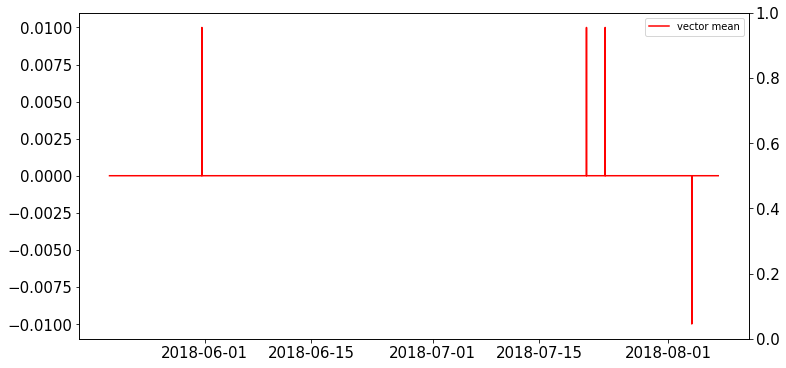

In [41]:
fig,ax1,ax2=plot1()
ax1.plot(dfwind.WS_vector-dfwind.WS_scalar,c='red',label='vector mean')
#ax1.plot(dfwind.WS_scalar,c='green',label='scalar mean')
ax1.legend()